In [28]:
import os
import pandas as pd
import numpy as np

import joblib
import pickle

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [5]:
X_train = pickle.load(open('data/processed/X_train.sav', 'rb'))
X_test = pickle.load(open('data/processed/X_test.sav', 'rb'))
y_train = pickle.load(open('data/processed/y_train.sav', 'rb'))
y_test = pickle.load(open('data/processed/y_test.sav', 'rb'))
rf_pipe = joblib.load('models/random_forest_pipeline.sav')

In [6]:
merged_nhanes_df = pd.read_csv('data/processed/merged_nhanes.csv')

# Equal Accuracy

# Gender

In [7]:
gender_test = merged_nhanes_df.loc[X_test.index, 'RIAGENDR']
X_test_gender_1 = X_test[gender_test == 1]
X_test_gender_2 = X_test[gender_test == 2]
y_test_gender_1 = y_test[gender_test == 1]
y_test_gender_2 = y_test[gender_test == 2]

In [8]:
test_score_gender_1 = roc_auc_score(y_test_gender_1, rf_pipe.predict_proba(X_test_gender_1)[:, 1])
test_score_gender_2 = roc_auc_score(y_test_gender_2, rf_pipe.predict_proba(X_test_gender_2)[:, 1])

In [9]:
test_score_gender_1

0.8289853872583516

In [10]:
test_score_gender_2

0.8482704830313254

# Ethinicity

In [11]:
ethnicity_test = merged_nhanes_df.loc[X_test.index, 'RIDRETH1']

In [12]:
X_test_ethnicity_1 = X_test[ethnicity_test == 1]
X_test_ethnicity_2 = X_test[ethnicity_test == 2]
X_test_ethnicity_3 = X_test[ethnicity_test == 3]
X_test_ethnicity_4 = X_test[ethnicity_test == 4]
X_test_ethnicity_5 = X_test[ethnicity_test == 5]
y_test_ethnicity_1 = y_test[ethnicity_test == 1]
y_test_ethnicity_2 = y_test[ethnicity_test == 2]
y_test_ethnicity_3 = y_test[ethnicity_test == 3]
y_test_ethnicity_4 = y_test[ethnicity_test == 4]
y_test_ethnicity_5 = y_test[ethnicity_test == 5]

In [13]:
test_score_ethnicity_1 = roc_auc_score(y_test_ethnicity_1, rf_pipe.predict_proba(X_test_ethnicity_1)[:, 1])
test_score_ethnicity_2 = roc_auc_score(y_test_ethnicity_2, rf_pipe.predict_proba(X_test_ethnicity_2)[:, 1])
test_score_ethnicity_3 = roc_auc_score(y_test_ethnicity_3, rf_pipe.predict_proba(X_test_ethnicity_3)[:, 1])
test_score_ethnicity_4 = roc_auc_score(y_test_ethnicity_4, rf_pipe.predict_proba(X_test_ethnicity_4)[:, 1])
test_score_ethnicity_5 = roc_auc_score(y_test_ethnicity_5, rf_pipe.predict_proba(X_test_ethnicity_5)[:, 1])

In [19]:
# Mexican American
test_score_ethnicity_1

0.7835743801652894

In [20]:
# Other Hispanic
test_score_ethnicity_2

0.7708826205641492

In [21]:
# Non Hispanic White
test_score_ethnicity_3

0.8779171878751121

In [22]:
# Non Hispanic Black
test_score_ethnicity_4

0.8286743886743888

In [23]:
# Other Race Including MultiRacial
test_score_ethnicity_5

0.6969298245614035

<BarContainer object of 5 artists>

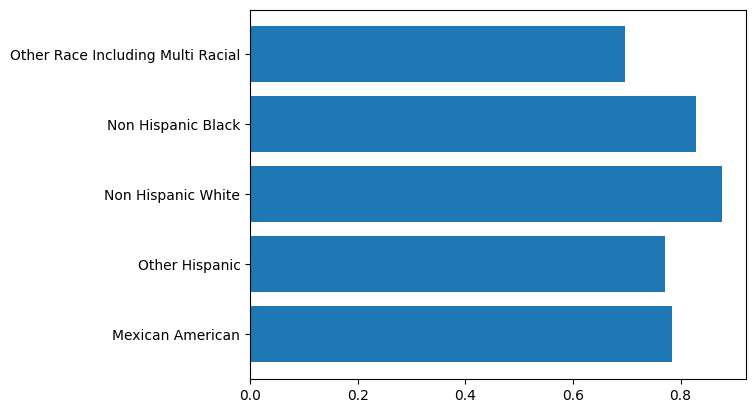

In [32]:
ethnicity_roc_auc = pd.DataFrame.from_dict([
    {"ethnicity": "Mexican American", "roc_auc": test_score_ethnicity_1},
    {"ethnicity": "Other Hispanic", "roc_auc": test_score_ethnicity_2},
    {"ethnicity": "Non Hispanic White", "roc_auc": test_score_ethnicity_3},
    {"ethnicity": "Non Hispanic Black", "roc_auc": test_score_ethnicity_4},
    {"ethnicity": "Other Race Including Multi Racial", "roc_auc": test_score_ethnicity_5}
])

plt.barh(y = ethnicity_roc_auc['ethnicity'], width = ethnicity_roc_auc['roc_auc'])

# Citizenship

In [34]:
citizen_test = merged_nhanes_df.loc[X_test.index, 'DMDCITZN']

In [35]:
X_test_citizen_1 = X_test[citizen_test == 1]
X_test_citizen_2 = X_test[citizen_test == 2]
y_test_citizen_1 = y_test[citizen_test == 1]
y_test_citizen_2 = y_test[citizen_test == 2]

In [36]:
test_score_citizen_1 = roc_auc_score(y_test_citizen_1, rf_pipe.predict_proba(X_test_citizen_1)[:, 1])
test_score_citizen_2 = roc_auc_score(y_test_citizen_2, rf_pipe.predict_proba(X_test_citizen_2)[:, 1])

In [37]:
test_score_citizen_1

0.8549461593682699

In [38]:
test_score_citizen_2

0.5598006644518272

<BarContainer object of 2 artists>

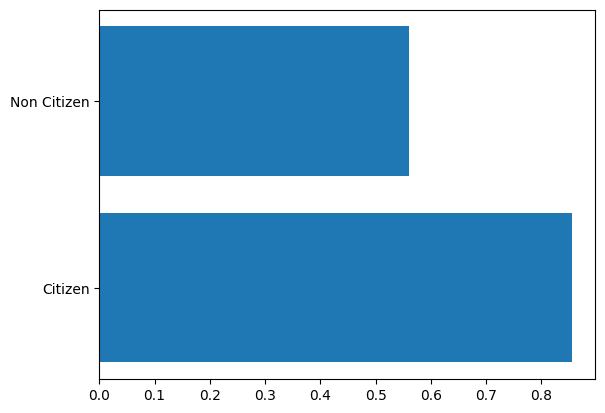

In [40]:
citizenship_roc_auc = pd.DataFrame.from_dict([
    {"status": "Citizen", "roc_auc": test_score_citizen_1},
    {"status": "Non Citizen", "roc_auc": test_score_citizen_2},
])

plt.barh(y = citizenship_roc_auc['status'], width = citizenship_roc_auc['roc_auc'])